In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container{width:100% !important;}</style>'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1003915864)

### Question 1

#### A)
\begin{align*}
    f(\theta|x) &= \frac{f(x|\theta)f(\theta)}{\int_{\theta} f(x|\theta')f(\theta')d\theta'} \\
        &= \frac{\theta^{\sum_{i=1}^n x_i}(1-\theta)^{n-\sum_{i=1}^n x_i}\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}}{\int_{\theta}{\theta'}^{\sum_{i=1}^n x_i}(1-\theta')^{n-\sum_{i=1}^n x_i}\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}{\theta'}^{a-1}(1-\theta')^{b-1} d\theta'} \\
        &= \frac{\theta^{a-1+\sum_{i=1}^nx_i}(1-\theta)^{b-1+n-\sum_{i=1}^nx_i}}{\int_{\theta}{\theta'}^{a-1+\sum_{i=1}^nx_i}(1-\theta')^{b-1+n-\sum_{i=1}^nx_i}d\theta'} \\
        &= \frac{\theta^{a-1+\sum_{i=1}^nx_i}(1-\theta)^{b-1+n-\sum_{i=1}^nx_i}}{\frac{\Gamma(a+\sum_{i=1}^nx_i)\Gamma(b+n-\sum_{i=1}^nx_i)}{\Gamma(a+b+n)}} \tag{using integration of Gamma distribution} \\
        &= \frac{\Gamma(a+b+n)}{\Gamma(a+\sum_{i=1}^nx_i)\Gamma(b+n-\sum_{i=1}^nx_i)} \theta^{a-1+\sum_{i=1}^nx_i}(1-\theta)^{b-1+n-\sum_{i=1}^nx_i} \\
        &= Beta\left(a+\sum_{i=1}^nx_i,b+n-\sum_{i=1}^nx_i\right)
\end{align*}

#### B)
$$\mathbb{E}[f(\theta|x)] = \frac{a+\sum_{i=1}^nx_i}{a+b+n}$$

#### C)
$f(\theta) = 1$ when $a=1, b=1$.

This is uniform distribution and this implies that everyone is equally likely to contract the virus.

#### D)

The posterior mean is very close to the sampled mean because the sampled mean is of data drawn from the posterior distribution. With the Law of Large Numbers, the sampled mean should converge to the true mean of the distribution which is what we see here. Since the prior is a completely different distribution than the posterior, the means are naturally different. The prior mean is agrees with the mean of a uniform distribution on 0 to 1 which is 0.5. Looking at the plotted distribution, the prior looks very uniform as well.

In [2]:
def plot_dists(a, b, n, sx, N=1000):
    prior = np.random.beta(a, b, size=N)
    postr = np.random.beta(a+sx, b+n-sx, size=N)

    fig, axs = plt.subplots(1, 2, figsize=(12,6))
    axs[0].set_title(f'Prior Distribution a={a}, b={b}, N={n}')
    axs[0].hist(prior)
    axs[0].set_xlabel('Sampled Values')
    axs[0].set_ylabel('Counts')
    axs[1].set_title(f'Posterior Distribution a={a}, b={b}, N={n}, sum = {sx}')
    axs[1].hist(postr)
    axs[1].set_xlabel('Sampled Values')
    axs[1].set_ylabel('Counts')

    plt.tight_layout()
    plt.show()
    
    return prior, postr


def beta_mean(a, b):
    return a / (a+b)

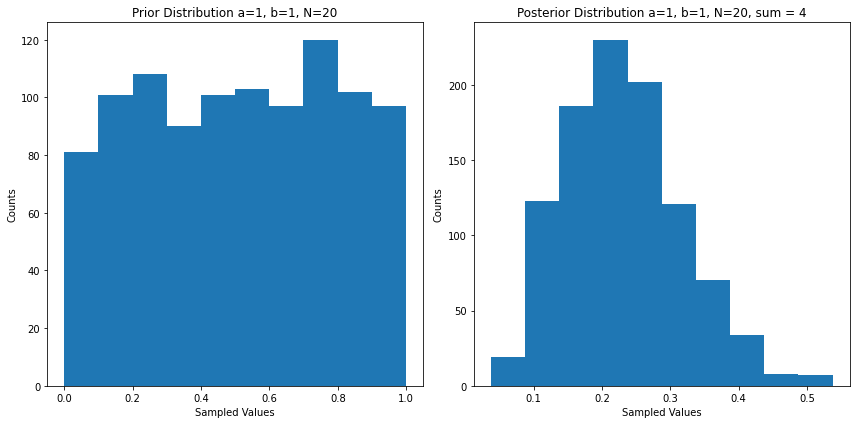

Posterior Mean: 0.227
Prior Mean: 0.500
Sample Mean: 0.232


In [3]:
a = 1
b = 1
sx = 4
n = 20
prior, posterior = plot_dists(a, b, n, sx)
print(f'Posterior Mean: {beta_mean(a+sx, b+n-sx):.3f}')
print(f'Prior Mean: {beta_mean(a, b):.3f}')
print(f'Sample Mean: {np.mean(posterior):.3f}')

#### E)
The prior with $a=1, b=3$ indicates a belief that $\theta$ tends to be of smaller value which is observed from the prior mean and the distribution, more concentrated towards left end and prior mean is smaller. And based on the observed data, we see that the posterior does tend to the lower end and is smaller than the value of D). From here, our prior here is much better than that of D).

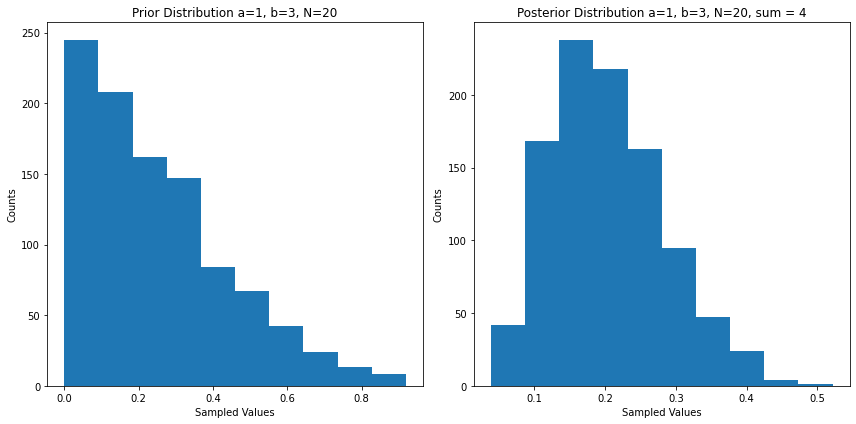

Posterior Mean: 0.208
Prior Mean: 0.250
Sample Mean: 0.204


In [4]:
a = 1
b = 3
sx = 4
n = 20
prior, posterior = plot_dists(a, b, n, sx)
print(f'Posterior Mean: {beta_mean(a+sx, b+n-sx):.3f}')
print(f'Prior Mean: {beta_mean(a, b):.3f}')
print(f'Sample Mean: {np.mean(posterior):.3f}')

#### F)
The prior mean is same with E) since the prior depends only on $a$ and $b$. The posterior mean, on the other hand, is larger than that of D) and E) since the number of infected individuals is much larger than previously, so the parameter $\theta$ should naturally be larger, hence a larger mean both seen from sampled and posterior distribution. Here, the observed data tells us that our prior is not very accurate and the true value of $\theta$ should be much larger which is shown through the posterior.

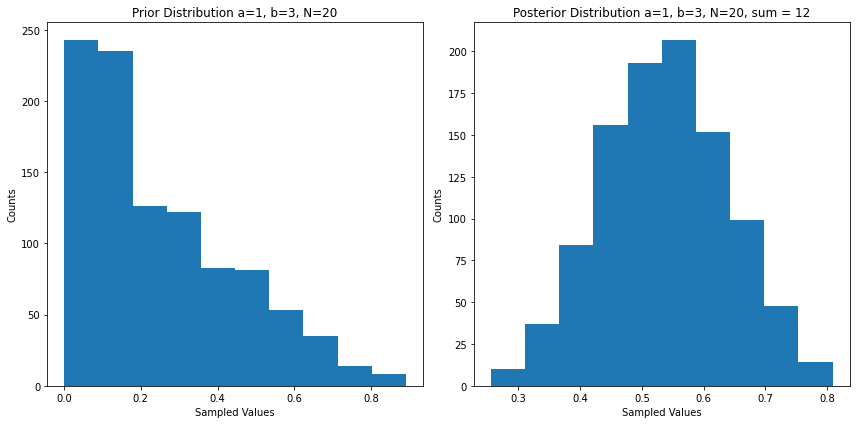

Posterior Mean: 0.542
Prior Mean: 0.250
Sample Mean: 0.537


In [5]:
a = 1
b = 3
sx = 12
n = 20
prior, posterior = plot_dists(a, b, n, sx)
print(f'Posterior Mean: {beta_mean(a+sx, b+n-sx):.3f}')
print(f'Prior Mean: {beta_mean(a, b):.3f}')
print(f'Sample Mean: {np.mean(posterior):.3f}')

#### H)
The family of distribution that the prior and posterior follow is the exponential family which follows the following form
$$f_{\theta}(x) = h(x)c(\theta)\exp\left(\sum_{i=1}^k w_i(\theta)t_i(x)\right)$$
where $\theta$ is all of the parameters, $h(x) \geq 0$, $t_i(x)$ independent of $\theta$, and $c(\theta) > 0$.

Another prior that is in exponential family is the Weibull Distribution $X \sim Weibull(\lambda, k), \lambda, k > 0$.
$$f(x) = \frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^k}, \text{when } x\geq 0; f(x)=0 \text{otherwise}$$

The associated likelihood is $\lambda\Gamma(1 + 1/k)$

### Question 2)

#### A)

\begin{align*}
    \mathbb{E}[X] &= \int_{0}^{\infty} x\lambda e^{-\lambda x} dx \\
        &= \lambda\times\left[-\frac{1}{\lambda}xe^{-\lambda x} \biggr\rvert_{x=0}^{\infty} + \frac{1}{\lambda}\int_{0}^{\infty}e^{-\lambda x}dx\right] \tag{integration by parts} \\
        &= \frac{-1}{\lambda}e^{-\lambda x} \biggr\rvert_{x=0}^{\infty} \tag{first part's limit goes to 0}\\
        &= \frac{1}{\lambda}
\end{align*}

#### B) + C)

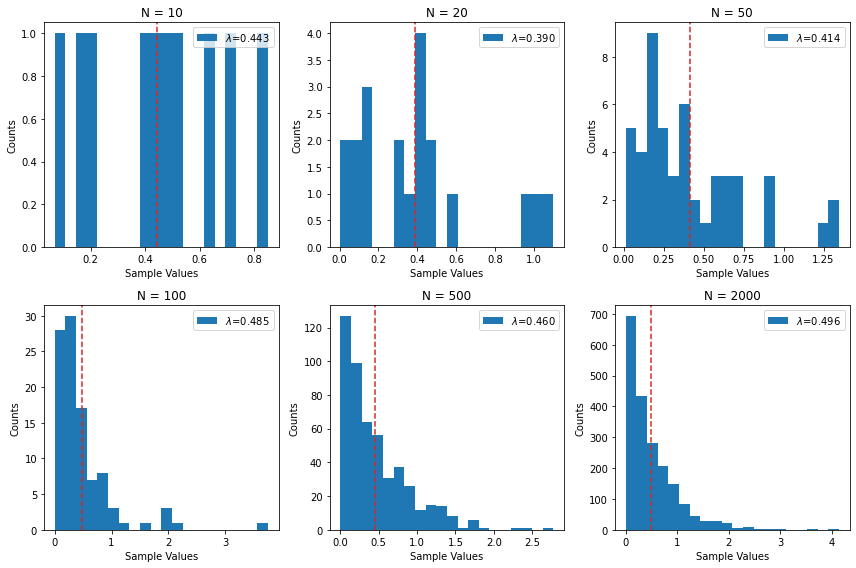

In [6]:
lbda = 2
sample_sizes = [10, 20, 50, 100, 500, 2000]
sample_means = []

fig, axs = plt.subplots(2,3,figsize=(12,8))
for i, n in enumerate(sample_sizes):
    xi = int(i/3)
    yi = int(i%3)
    
    x = np.random.exponential(scale=1/lbda, size=n)
    sample_means.append(np.mean(x))
    axs[xi,yi].hist(x, bins=20, label=f'$\lambda$={np.mean(x):.3f}')
    axs[xi,yi].axvline(x=np.mean(x), color='tab:red', linestyle='--')
    axs[xi,yi].set_xlabel('Sample Values')
    axs[xi,yi].set_ylabel('Counts')
    axs[xi,yi].set_title(f'N = {n}')
    axs[xi,yi].legend()
plt.tight_layout()
plt.show()

#### D)
As the sample size grows, the sample mean approaches to the horizontal line which is the theoretical mean.

The law for explaining this behavior is the Law of Large Numbers which states that as the sample sizes grow, the sample mean gets closer and closer to the true average of the whole population (which is the exponential distribution with mean of 0.5).

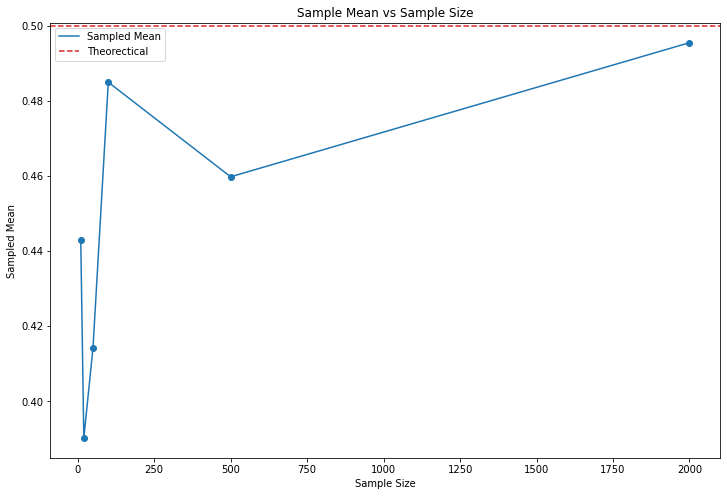

In [7]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_title('Sample Mean vs Sample Size')

ax.scatter(sample_sizes, sample_means)
ax.plot(sample_sizes, sample_means, label='Sampled Mean')
ax.axhline(0.5, color='tab:red', linestyle='--', label='Theorectical')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Sampled Mean')
plt.legend()
plt.show()

### Question 3

#### A)

In [8]:
tao, b0, b1, b2, b3, c = 2, 5, 0.6, 0.8, 0.4, 0.5
N = 1000

x1 = np.random.uniform(-100, 100, size=N)
x2 = np.random.uniform(-150, 150, size=N)
d = np.random.randint(0, high=5, size=N)
eps = np.random.normal(loc=0, scale=tao, size=N)

In [9]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

y = sigmoid(b0 + b1 * x1 + b2 * x2 + b3 * d + eps)
y[y > c] = 1
y[y <= c] = 0

#### B)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = np.stack((x1,x2,d), axis=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
logistic = LogisticRegression(penalty='none').fit(X_train, y_train)

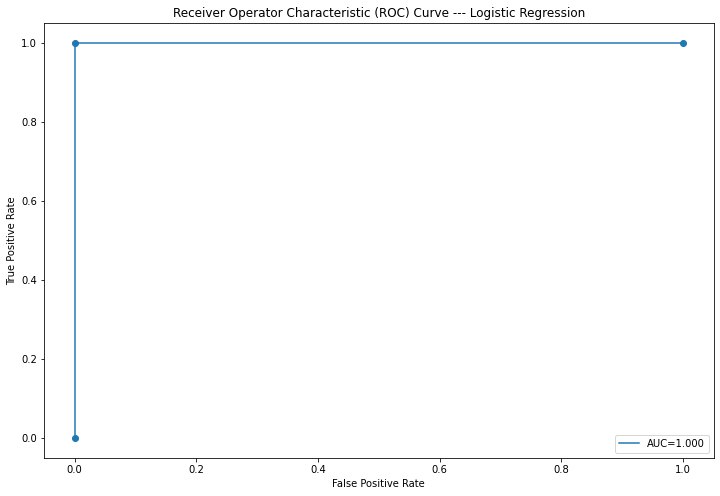

In [11]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
y_pred_test = logistic.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test, pos_label=1)
auc = metrics.roc_auc_score(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operator Characteristic (ROC) Curve --- Logistic Regression')
ax.scatter(fpr, tpr)
ax.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.legend(loc=4)
plt.show()

#### C)

In [12]:
from sklearn.tree import DecisionTreeClassifier

def bootstrap(X, y, M=1000, B=5000):
    count = X.shape[0]
    res = np.zeros(B)
    for i in range(B):
        id_train = np.random.choice(np.arange(count), size=M)
        id_test = np.delete(np.arange(count), id_train)
        clf = DecisionTreeClassifier().fit(X[id_train, :], y[id_train])
        
        y_pred = clf.predict(X[id_test, :])
        res[i] = metrics.accuracy_score(y[id_test], y_pred)
    return res

In [13]:
scores = bootstrap(X, y)

#### D)

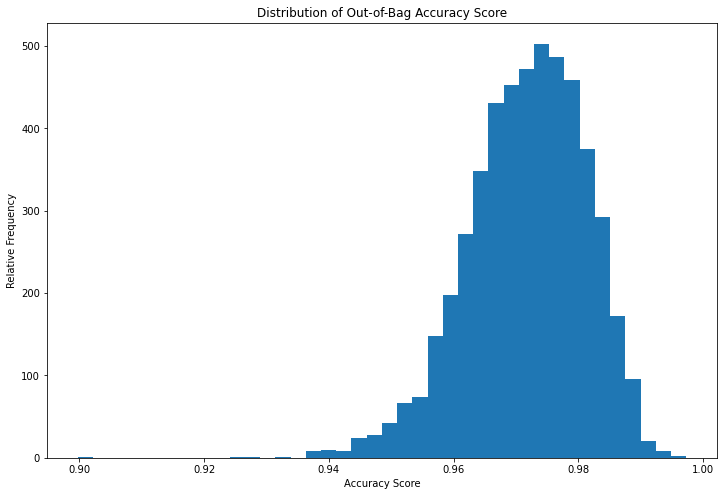

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(scores, bins=40)
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Accuracy Score')
ax.set_title('Distribution of Out-of-Bag Accuracy Score')
plt.show()

#### E)

In [15]:
y_pred_logistic = logistic.predict(X_test)
logistic_score = metrics.accuracy_score(y_test, y_pred_logistic)

print(f"Logistic Regression Accuracy: {logistic_score:.3f}")
print(f"Bootstrapping Mean Accuracy Score: {np.mean(scores):.3f}")

Logistic Regression Accuracy: 1.000
Bootstrapping Mean Accuracy Score: 0.972


### Bonus
i) Gamma distribution (#1) because the values for price of cup of coffee is reasonable and it makes sense that there is very small portion of coffee that is sold very cheap or very expensive. The distribution is also skewed left because coffee are generally not too expensive (most is reasonable price and some can be very expensive).

ii) Beta distribution (#3) because the proporation has to be less than 1 and beta distribution is bounded between 0 and 1.

iii) Binomial distribution (#4) because the number of people is discrete and binomial distribution is discrete, especially it is a small group.

iv）Normal distribution (#2) because the weekly change and be positive and negative (looking at domain of the problem). Since it is a larger sample size (US population), the distribution becomes more continuous-like.